In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

#Libraries for Linear Regression Model and Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score # Sklearn package's randomized data splitting function
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')


In [3]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
data.shape

(1436, 38)

In [6]:
data=data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Quarterly_Tax,1436.0,87.122563,41.128611,19.0,69.0,85.0,85.00,283.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [8]:
data=data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [9]:
data[data.duplicated()].shape

(1, 9)

In [10]:
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
data=data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [12]:
data.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64


Printing the Plot for Feature:  Price
***********************************


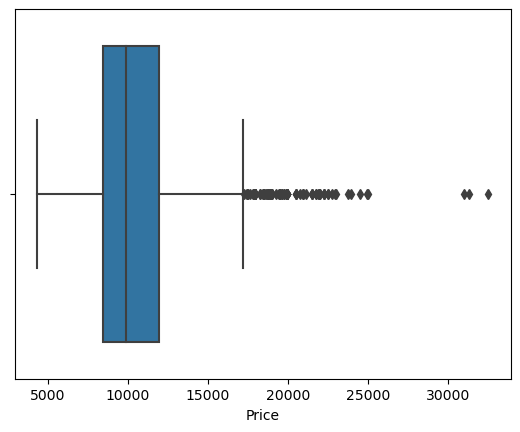


Printing the Plot for Feature:  Age
***********************************


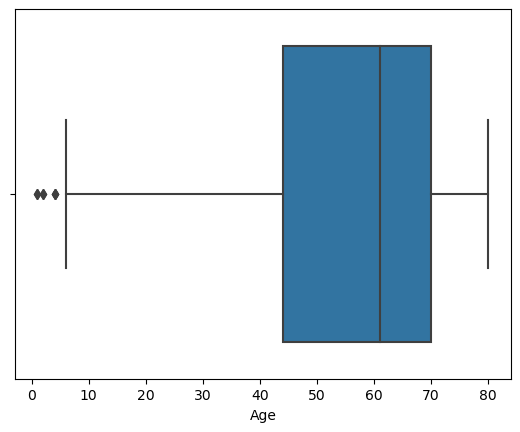


Printing the Plot for Feature:  KM
***********************************


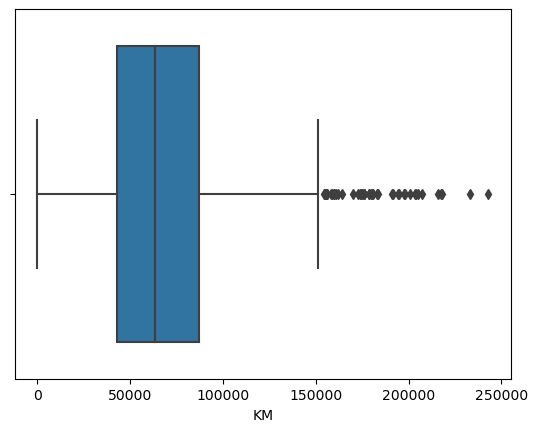


Printing the Plot for Feature:  HP
***********************************


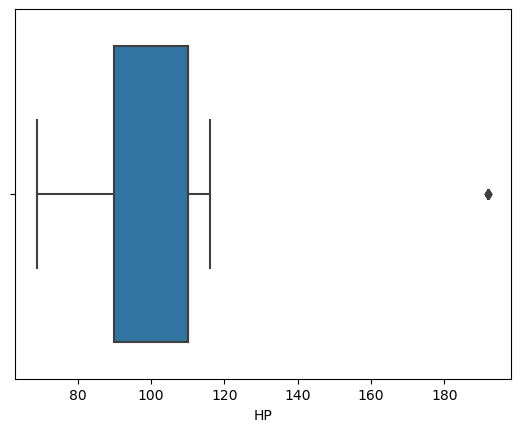


Printing the Plot for Feature:  CC
***********************************


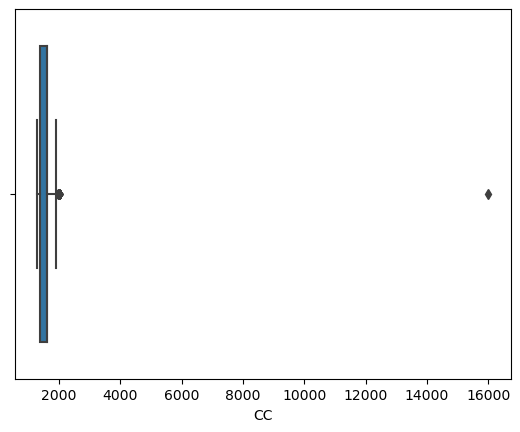


Printing the Plot for Feature:  Doors
***********************************


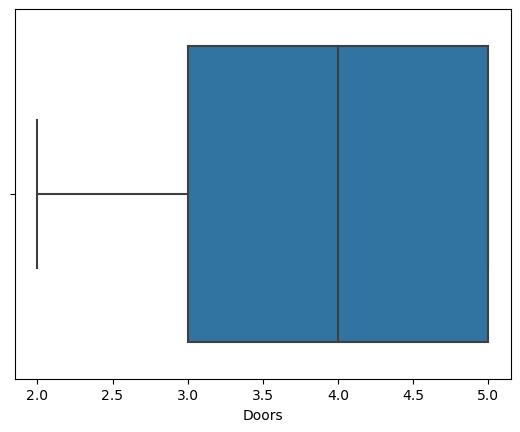


Printing the Plot for Feature:  Gears
***********************************


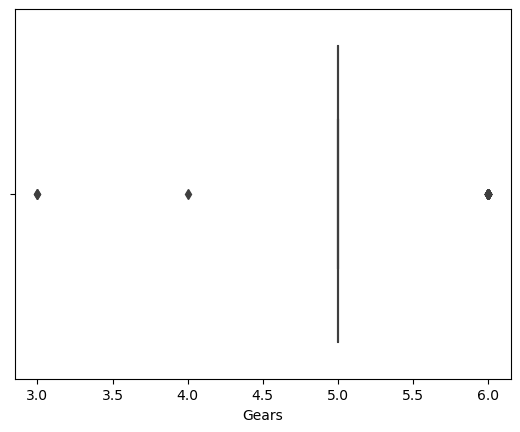


Printing the Plot for Feature:  QT
***********************************


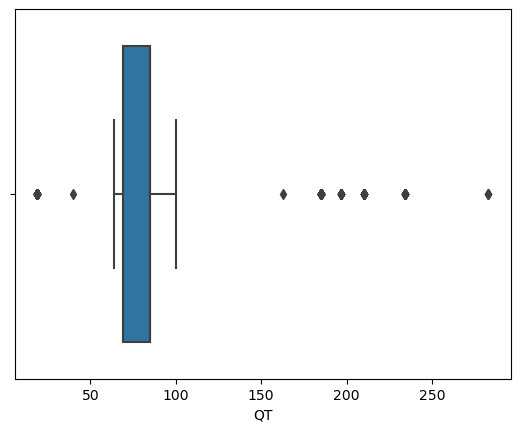


Printing the Plot for Feature:  Weight
***********************************


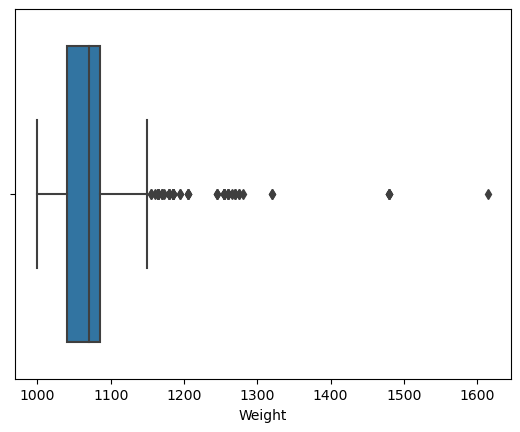

In [13]:
for i in data.columns:
    if data[i].dtype == 'int64' or data[i].dtype =='float64':
        print("\nPrinting the Plot for Feature: ", i)
        print("***********************************")
        sns.boxplot(x=i, data= data)
        plt.show()


Printing the Plot for Feature:  Price
***********************************


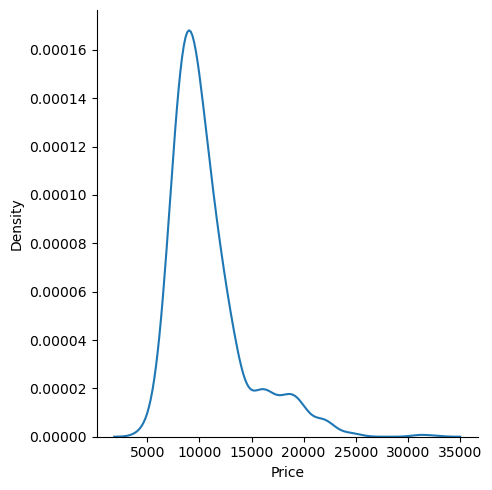


Printing the Plot for Feature:  Age
***********************************


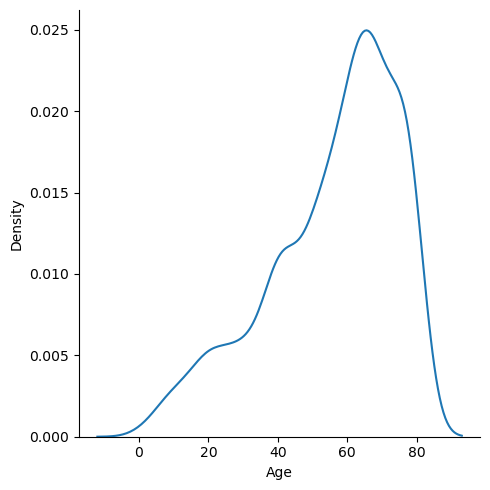


Printing the Plot for Feature:  KM
***********************************


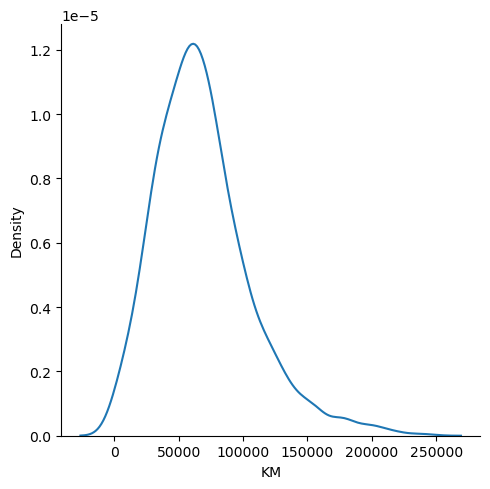


Printing the Plot for Feature:  HP
***********************************


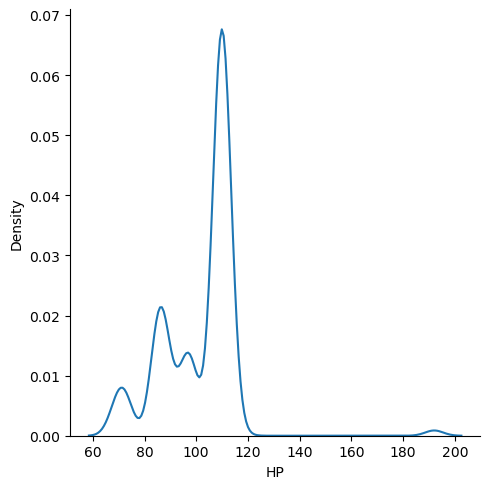


Printing the Plot for Feature:  CC
***********************************


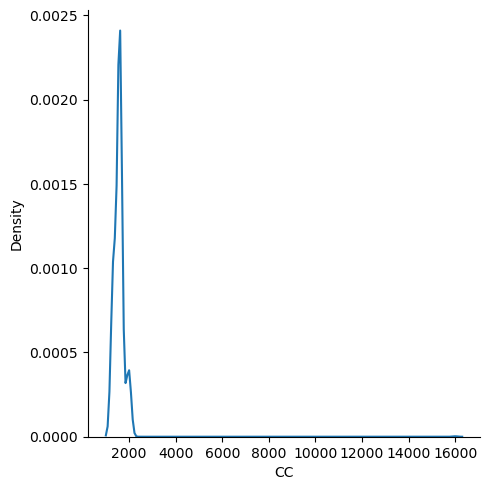


Printing the Plot for Feature:  Doors
***********************************


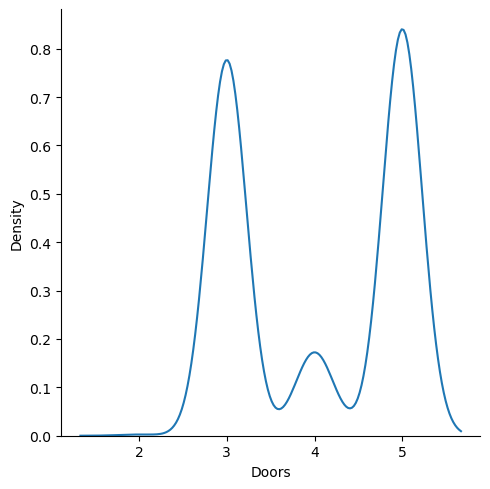


Printing the Plot for Feature:  Gears
***********************************


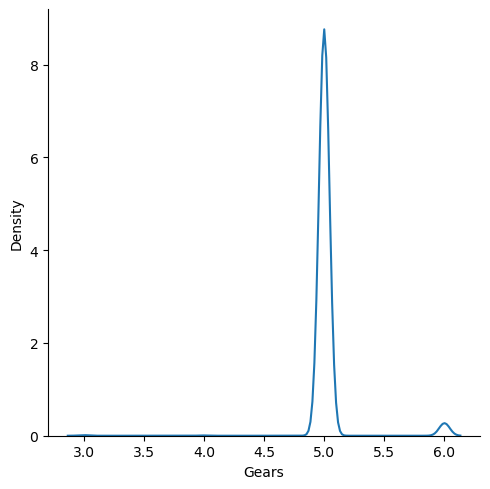


Printing the Plot for Feature:  QT
***********************************


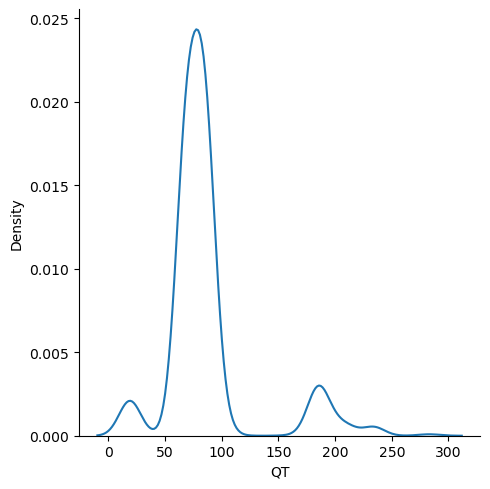


Printing the Plot for Feature:  Weight
***********************************


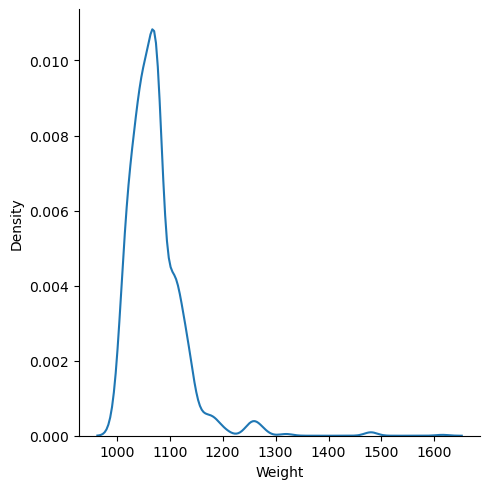

In [14]:
for i in data.columns:
    if data[i].dtype == 'int64' or data[i].dtype =='float64':
        print("\nPrinting the Plot for Feature: ", i)
        print("***********************************")
        sns.displot(data[i], kind='kde')
        plt.show()

# Visualise heatmap correlation

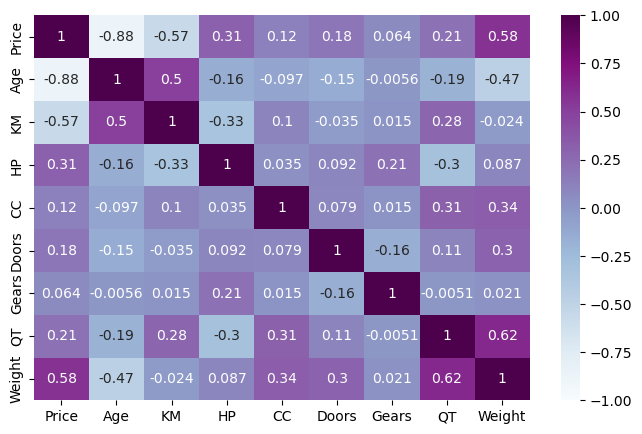

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='BuPu', annot_kws={'size': 10});

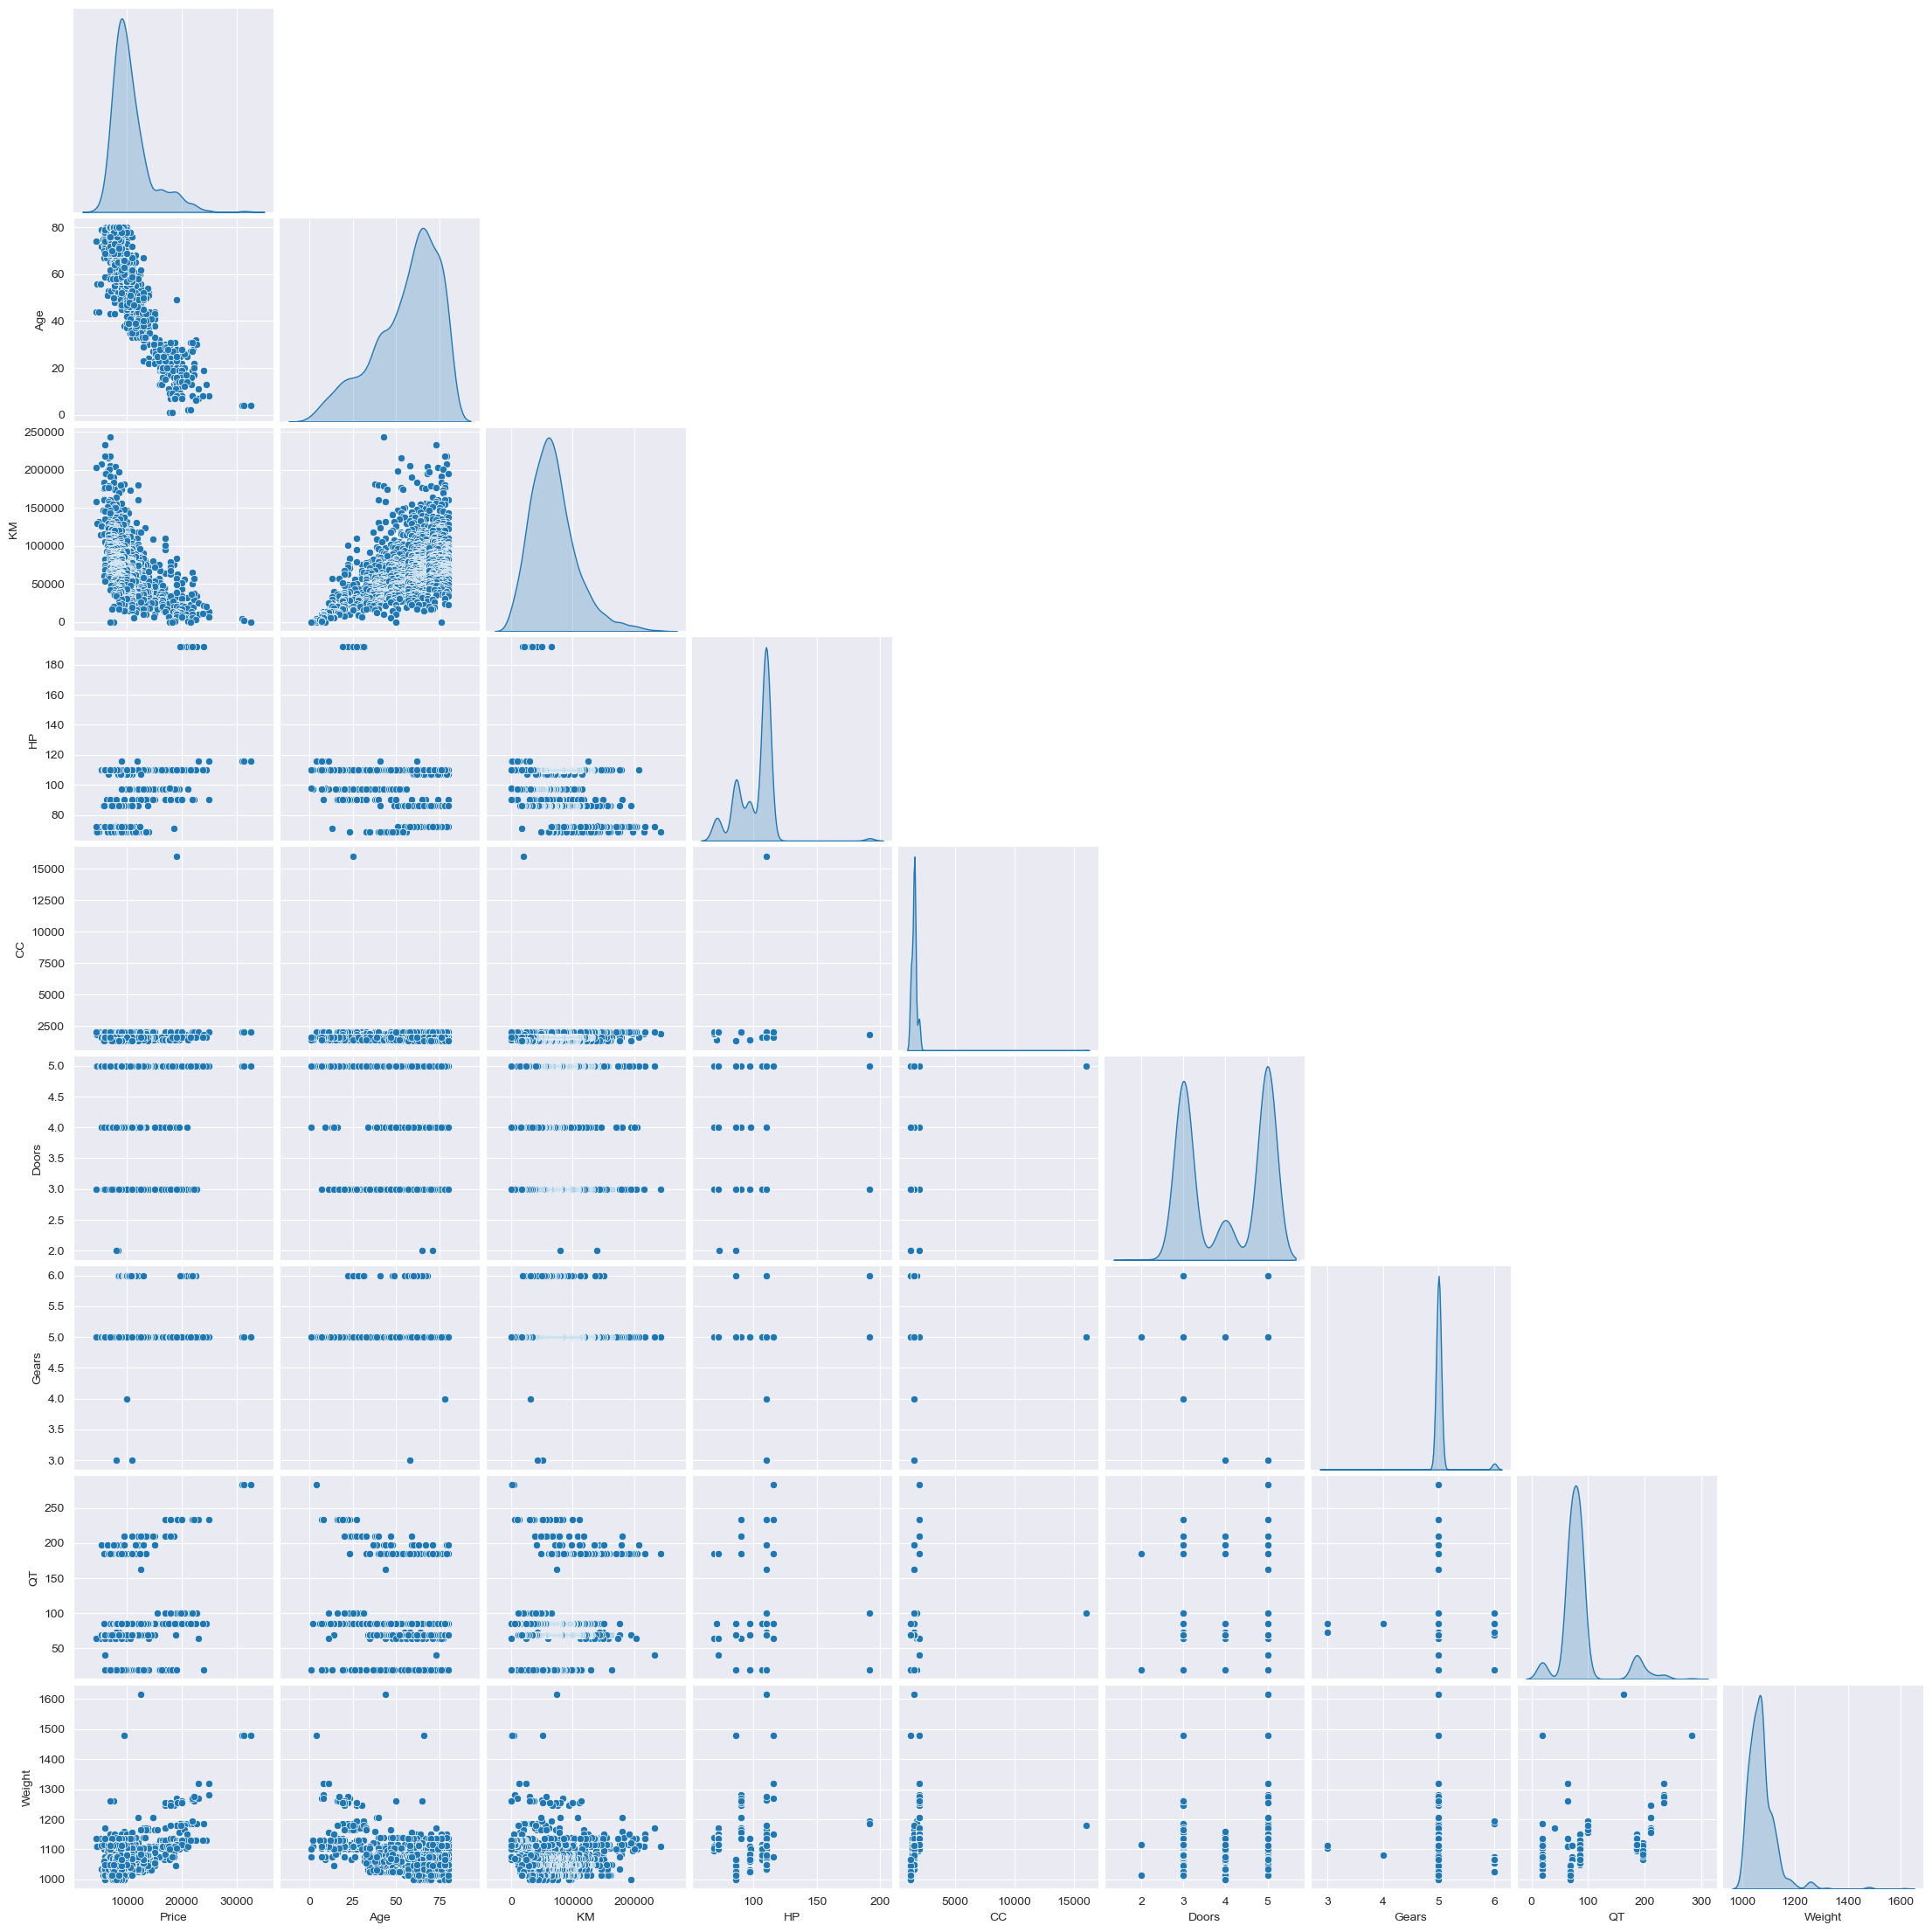

In [16]:
sns.set_style(style='darkgrid')
sns.pairplot(data,corner=True,diag_kind='kde')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   CC      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


#### Simple Linear Regression to start with

In [18]:
#Build model
myformula = 'Price~KM'
model = smf.ols(myformula,data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     687.6
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          4.12e-124
Time:                        15:36:05   Log-Likelihood:                -13509.
No. Observations:                1435   AIC:                         2.702e+04
Df Residuals:                    1433   BIC:                         2.703e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.448e+04    163.344     88.643      0.000    1.42e+04    1.48e+04
KM            -0.0548      0.002    -26.222      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.246   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1119.937
Skew:                           1.385   Prob(JB):                    6.44e-244
Kurtosis:                       6.325   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#Build model
myformula = 'Price~HP'
model = smf.ols(myformula,data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     156.9
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           3.12e-34
Time:                        15:36:05   Log-Likelihood:                -13715.
No. Observations:                1435   AIC:                         2.743e+04
Df Residuals:                    1433   BIC:                         2.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3041.1318    619.766      4.907      0.000    1825.386    4256.877
HP            75.6689      6.041     12.526      0.000      63.818      87.519
==============================================================================
Omnibus:                      447.247   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.705
Skew:                           1.586   Prob(JB):                    6.00e-288
Kurtosis:                       6.473   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
myformula = 'Price~Weight'
model = smf.ols(myformula,data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     711.0
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          1.55e-127
Time:                        15:36:05   Log-Likelihood:                -13501.
No. Observations:                1435   AIC:                         2.701e+04
Df Residuals:                    1433   BIC:                         2.702e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.193e+04   1601.273    -19.938      0.000   -3.51e+04   -2.88e+04
Weight        39.7719      1.492     26.665      0.000      36.846      42.698
==============================================================================
Omnibus:                      104.356   Durbin-Watson:                   0.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.888
Skew:                           0.046   Prob(JB):                    2.57e-112
Kurtosis:                       5.930   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
myformula = 'Price~QT'
model = smf.ols(myformula,data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     67.11
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           5.63e-16
Time:                        15:36:05   Log-Likelihood:                -13757.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1433   BIC:                         2.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9099.3086    218.769     41.593      0.000    8670.166    9528.451
QT            18.6348      2.275      8.192      0.000      14.173      23.097
==============================================================================
Omnibus:                      373.719   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              865.401
Skew:                           1.428   Prob(JB):                    1.20e-188
Kurtosis:                       5.512   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
myformula = 'Price~Gears'
model = smf.ols(myformula,data=data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.863
Date:                Thu, 09 Nov 2023   Prob (F-statistic):             0.0156
Time:                        15:36:05   Log-Likelihood:                -13787.
No. Observations:                1435   AIC:                         2.758e+04
Df Residuals:                    1433   BIC:                         2.759e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4580.9348   2537.643      1.805      0.071    -396.959    9558.828
Gears       1221.5268    504.500      2.421      0.016     231.889    2211.165
==============================================================================
Omnibus:                      480.949   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1497.580
Skew:                           1.691   Prob(JB):                         0.00
Kurtosis:                       6.690   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
myformula = 'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight'
model = smf.ols(myformula,data=data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:36:05   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Split Data

In [24]:
# lets build our linear model
# independant variables
X = data.drop(['Price'], axis=1)
# the dependent variable
y = data[['Price']]

In [25]:
X

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1430,69,20544,86,1300,3,5,69,1025
1431,72,19000,86,1300,3,5,69,1015
1432,71,17016,86,1300,3,5,69,1015
1433,70,16916,86,1300,3,5,69,1015


In [26]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1430,7500
1431,10845
1432,8500
1433,7250


In [27]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [28]:
X_train.shape

(1004, 8)

In [29]:
X_test.shape

(431, 8)

In [30]:
y_train.shape

(1004, 1)

In [31]:
y_test.shape

(431, 1)

## Fit Linear Model

In [32]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [33]:
#Linear Regression
reg_model = LinearRegression().fit(X_train, y_train)
print(reg_model.score(X_train, y_train),reg_model.score(X_test, y_test))

0.863310977170765 0.6482951880478649


In [34]:
regression_model.coef_

array([[-1.23727428e+02, -1.66083702e-02,  4.31161461e+01,
        -2.40807277e+00, -2.99214030e+01,  4.32962035e+02,
         1.11184334e+01,  1.75215904e+01]])

In [35]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is -123.72742771607768
The coefficient for KM is -0.01660837015827137
The coefficient for HP is 43.11614608685173
The coefficient for CC is -2.4080727743702726
The coefficient for Doors is -29.9214029568342
The coefficient for Gears is 432.9620352695695
The coefficient for QT is 11.118433437631056
The coefficient for Weight is 17.521590424819067


In [36]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3638.284153051929


The score (R^2) for in-sample and out of sample

In [37]:
regression_model.score(X_train, y_train)

0.863310977170765

In [38]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.6482951880478649

In [39]:
findcarpred = data.copy()

In [40]:
findcarpred.head(2)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [41]:
findcarpred['ypred'] = regression_model.predict(X)

In [42]:
findcarpred.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,ypred
0,13500,23,46986,90,2000,3,5,210,1165,16622.501563
1,13750,23,72937,90,2000,3,5,210,1165,16191.497749
2,13950,24,41711,90,2000,3,5,210,1165,16586.383287
3,14950,26,48000,90,2000,3,5,210,1165,16234.478392
4,13750,30,38500,90,2000,3,5,210,1170,15984.956150


In [43]:
findcarpred['Error'] = findcarpred['Price']-findcarpred['ypred']

In [44]:
findcarpred.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,ypred,Error
0,13500,23,46986,90,2000,3,5,210,1165,16622.501563,-3122.501563
1,13750,23,72937,90,2000,3,5,210,1165,16191.497749,-2441.497749
2,13950,24,41711,90,2000,3,5,210,1165,16586.383287,-2636.383287
3,14950,26,48000,90,2000,3,5,210,1165,16234.478392,-1284.478392
4,13750,30,38500,90,2000,3,5,210,1170,15984.956150,-2234.956150


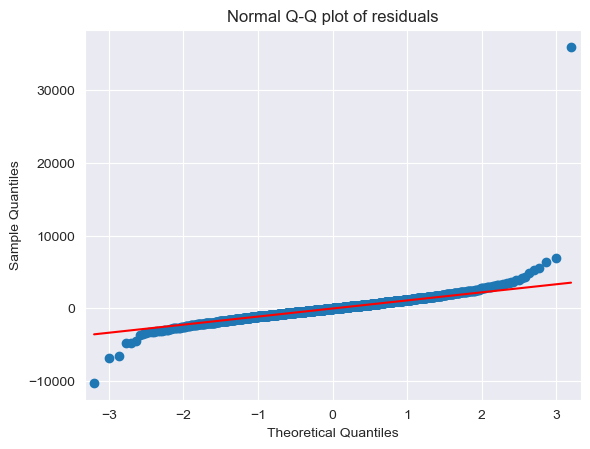

In [45]:
import statsmodels.api as sm
qqplot=sm.qqplot(findcarpred['Error'],line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [46]:
list(np.where(findcarpred['Error']>10))

[array([   6,    7,    8,   13,   14,   15,   16,   17,   18,   19,   20,
          21,   22,   23,   24,   26,   27,   28,   29,   32,   35,   38,
          41,   43,   45,   46,   47,   49,   51,   52,   53,   58,   59,
          61,   62,   63,   64,   65,   66,   68,   70,   72,   74,   75,
          76,   77,   78,   80,   81,   83,   84,   85,   89,   90,   91,
          92,   94,   95,   98,   99,  100,  102,  103,  104,  105,  106,
         107,  108,  109,  110,  111,  112,  113,  114,  115,  117,  118,
         119,  120,  122,  124,  125,  127,  135,  137,  138,  140,  141,
         142,  143,  145,  146,  147,  148,  149,  150,  151,  152,  153,
         155,  156,  157,  158,  159,  160,  161,  162,  164,  165,  166,
         167,  168,  169,  170,  171,  172,  173,  174,  175,  176,  177,
         178,  179,  181,  182,  184,  189,  192,  193,  195,  196,  203,
         204,  209,  210,  215,  222,  229,  231,  232,  236,  237,  244,
         246,  247,  252,  255,  256, 

In [47]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

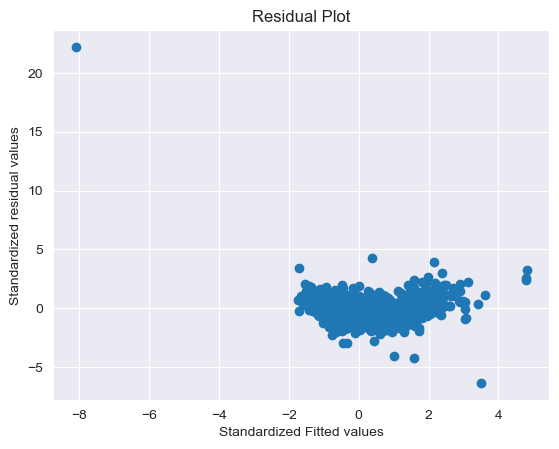

In [48]:
plt.scatter(get_standardized_values(findcarpred['ypred']),
            get_standardized_values(findcarpred['Error']))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


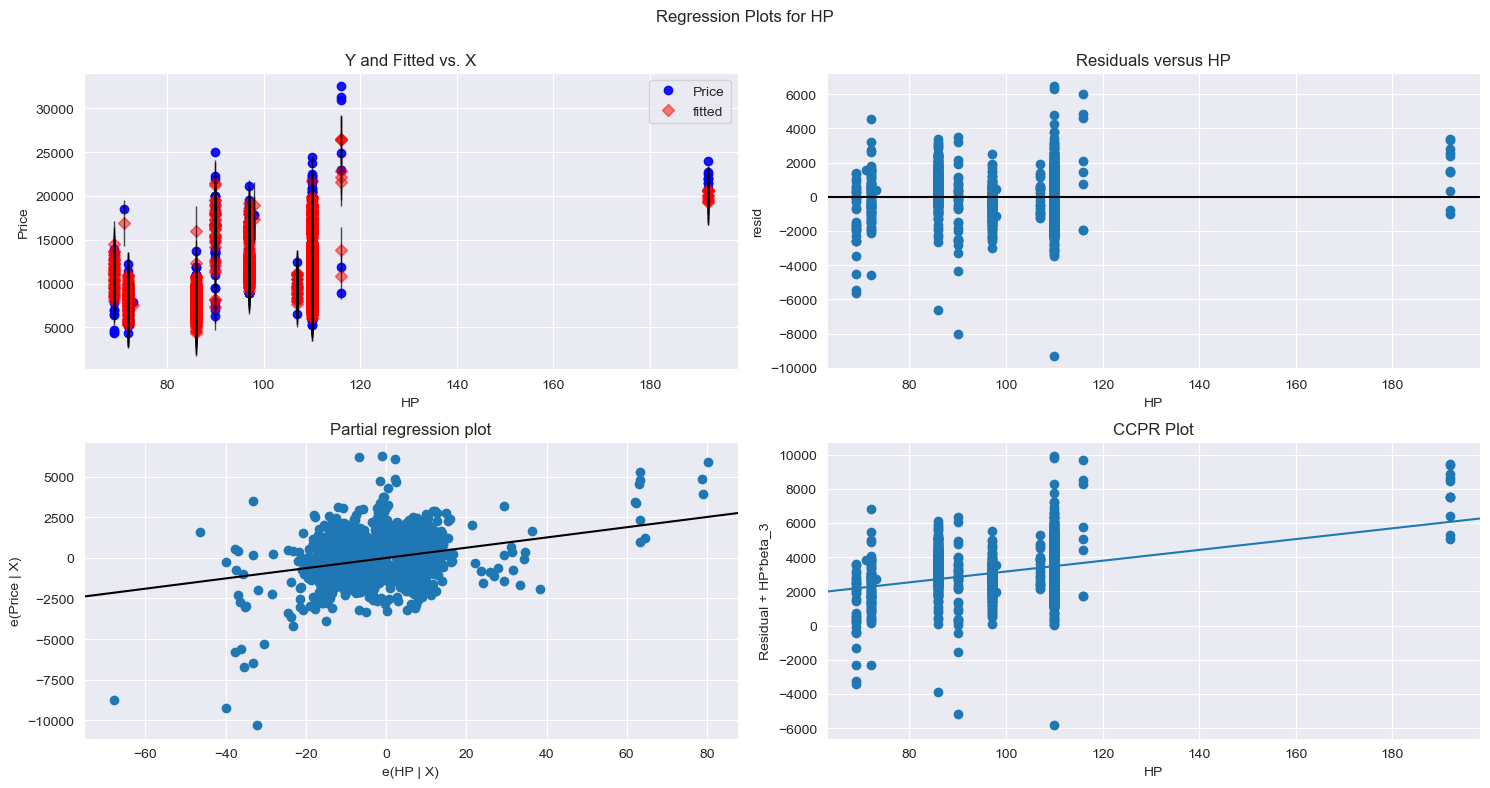

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

## Model  Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [50]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

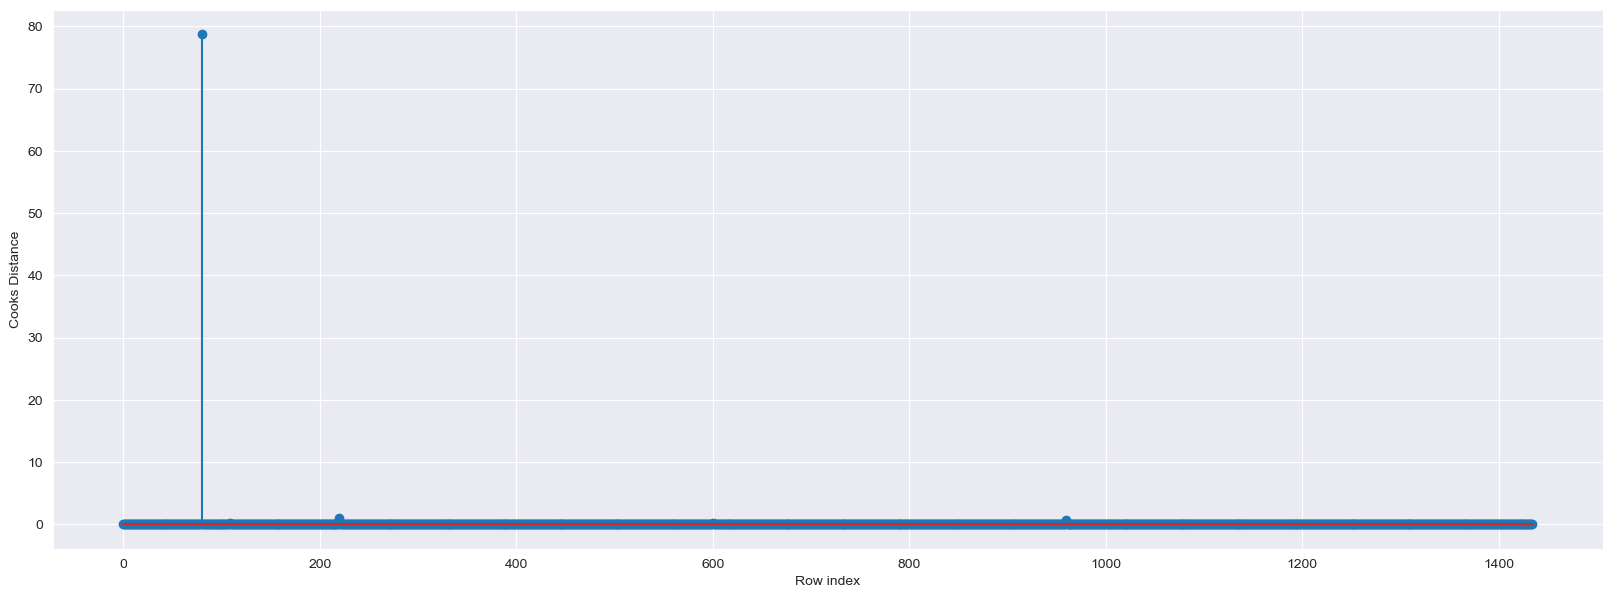

In [51]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [52]:
#index and value of influencer
(np.argmax(c),np.max(c))

(80, 78.72950582248923)

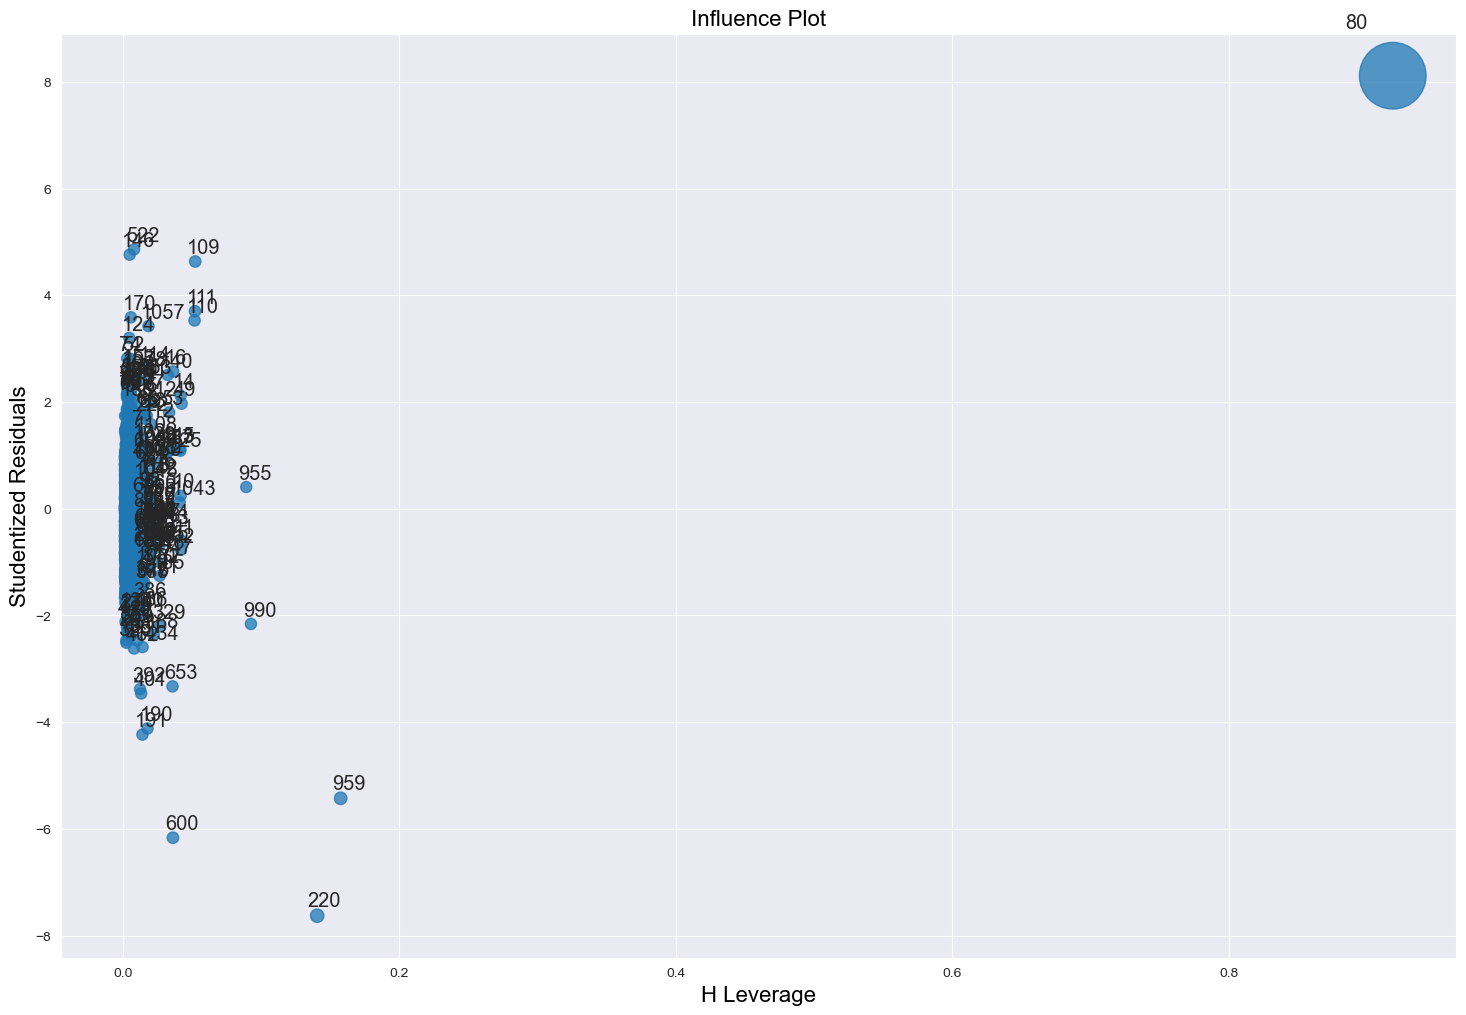

In [53]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(18,12))
influence_plot(model, ax=ax, criterion='cooks')
plt.show()

In [54]:
data.shape

(1435, 9)

In [55]:
## Below is for leverage cutoff
n = data.shape[0]
k = data.shape[1]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.020905923344947737


In [56]:
# obtain Cook's distance 
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n= data.shape[0]
critical_d = 4/n
print('Critical Cooks distance:', critical_d)
out_d = model_cooksd > critical_d

# output potential outliers with leverage
print(data.index[out_d], "\n", 
    model_cooksd[out_d])

Critical Cooks distance: 0.0027874564459930314
Int64Index([   0,    1,    2,    4,    5,    7,    8,   12,   13,   14,   15,
              16,   30,   49,   52,   53,   68,   74,   80,   89,   91,  109,
             110,  111,  112,  114,  118,  124,  137,  140,  146,  153,  160,
             170,  173,  177,  178,  185,  186,  188,  190,  191,  202,  208,
             220,  222,  253,  329,  378,  386,  387,  392,  401,  411,  457,
             462,  486,  522,  600,  614,  616,  653,  695,  729,  810,  912,
             959,  990, 1053, 1057, 1058, 1071, 1078, 1108, 1401, 1425, 1434],
           dtype='int64') 
 [7.22221054e-03 3.94547973e-03 5.44224039e-03 4.09783478e-03
 3.87270508e-03 2.94568525e-03 5.18314571e-03 2.88934316e-03
 5.71724872e-03 2.17715288e-02 6.09028166e-03 2.78048497e-02
 3.49252187e-03 1.91473286e-02 4.81627020e-03 1.25625834e-02
 5.77277375e-03 2.81858979e-03 7.87295058e+01 6.01541723e-03
 1.10736439e-02 1.30261411e-01 7.53028936e-02 8.33256249e-02
 5.77158285e

In [57]:
data[data.index.isin([  0,    1,    2,    4,    5,    7,    8,   12,   13,   14,   15,
              16,   30,   49,   52,   53,   68,   74,   80,   89,   91,  109,
             110,  111,  112,  114,  118,  124,  137,  140,  146,  153,  160,
             170,  173,  177,  178,  185,  186,  188,  190,  191,  202,  208,
             220,  222,  253,  329,  378,  386,  387,  392,  401,  411,  457,
             462,  486,  522,  600,  614,  616,  653,  695,  729,  810,  912,
             959,  990, 1053, 1057, 1058, 1071, 1078, 1108, 1401, 1425, 1434])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1078,8950,79,138500,86,1300,5,5,69,1050
1108,8950,76,120263,72,2000,5,5,64,1135
1401,10500,78,47400,86,1300,5,5,69,1040
1425,9950,78,30964,110,1600,3,4,85,1080


In [58]:
#Discard the data points which are influencers and reasign the row number (reset_index())
# Copying the data to a new dataframe to avoid deleting the data from the original dataframe
new_data =data.drop(data.index[[   0,    1,    2,    4,    5,    7,    8,   12,   13,   14,   15,
              16,   30,   49,   52,   53,   68,   74,   80,   89,   91,  109,
             110,  111,  112,  114,  118,  124,  137,  140,  146,  153,  160,
             170,  173,  177,  178,  185,  186,  188,  190,  191,  202,  208,
             220,  222,  253,  329,  378,  386,  387,  392,  401,  411,  457,
             462,  486,  522,  600,  614,  616,  653,  695,  729,  810,  912,
             959,  990, 1053, 1057, 1058, 1071, 1078, 1108, 1401, 1425, 1434]],axis=0).reset_index()

In [59]:
new_data.head(2)

,index,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,3,14950,26,48000,90,2000,3,5,210,1165
1,6,16900,27,94612,90,2000,3,5,210,1245


In [60]:
#Drop the original index
new_data = new_data.drop(['index'],axis=1)

In [61]:
new_data.head(2)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,14950,26,48000,90,2000,3,5,210,1165
1,16900,27,94612,90,2000,3,5,210,1245


In [62]:
myformula = 'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight'
model = smf.ols(myformula,data=new_data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1400.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:39:36   Log-Likelihood:                -11336.
No. Observations:                1358   AIC:                         2.269e+04
Df Residuals:                    1349   BIC:                         2.274e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.216e+04   1474.639     -8.244      0.000   -1.51e+04   -9264.519
Age         -112.5232      2.216    -50.781      0.000    -116.870    -108.176
KM            -0.0166      0.001    -15.553      0.000      -0.019      -0.015
HP            20.6891      2.956      6.998      0.000      14.889      26.489
CC            -2.5966      0.293     -8.856      0.000      -3.172      -2.021
Doors       -108.6114     33.684     -3.224      0.001    -174.690     -42.532
Gears        347.1359    174.569      1.989      0.047       4.680     689.592
QT            -0.1011      1.411     -0.072      0.943      -2.870       2.668
Weight        28.8990      1.372     21.061      0.000      26.207      31.591
==============================================================================
Omnibus:                        1.872   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.755
Skew:                           0.076   Prob(JB):                        0.416
Kurtosis:                       3.088   Cond. No.                     4.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""